### Google Trend  
Assumed that people will search for related information before they buy something, analysing google trend data should be a way to predict ETF price change. Thus, this part is to compare ETF close price and volume to google trend data, hoping to find out the correlation between them. Furthermore, if the relationship exist, the next step will be comparing the extend between different sector.      

First, import the packages and set the style of plot.  
The selected ETF is SPDR sector ETFs, included market, industry, healthcare, technology, energy and finance.  

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#set plot type
plt.rcParams['figure.figsize'] = (15, 3)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False #show minus
spdr = ['SPY','XLI','XLV','XLK','XLE','XLF'] # spdr sector'XLI

In [55]:
# google trend data
df_g = pd.read_excel('google_trend.xlsx')
date_ = df_g['date']
df_g.set_index('date', inplace=True)
df_g.loc['2015-05-01':].tail()

DIA ETF  isPartial  SPY ETF  QQQ ETF  IVV ETF  XLI ETF  XLV ETF  \
date                                                                          
2019-04-28       27      False       20       62       76       55       28   
2019-05-05       32      False       35       50       80       18       21   
2019-05-12       22      False       38       68       61       18       21   
2019-05-19       22      False       23       65       50        0       41   
2019-05-26       17      False       30       59       35       18        0   

            XLK ETF  XLE ETF  XLF ETF  IYW ETF  IYF ETF  IYE ETF  IYH ETF  \
date                                                                        
2019-04-28       49        8       13       33       42        0        0   
2019-05-05       34       10       20        0        0        0        0   
2019-05-12       34       10       17       49        0        0        0   
2019-05-19       48       18       23       64        0        0       38   
2019-05-26       24       10       13        0        0        0        0   

            IHE ETF  IBB ETF  SMH ETF  XLB ETF  XLP ETF  XLY ETF  
date                                                              
2019-04-28       44       38       40       21       16       35  
2019-05-05        0       21       20        0        0       34  
2019-05-12        0       25       60       43       32       21  
2019-05-19        0       17       20       21       48       20  
2019-05-26        0        8       59        0       24       20

Since ETF data is daily and google trend data is weekly, to calculate the correlation and visualize the data more accuratly, I sort out ETF data and get the weekly close price and volume data. Besides, google trend weekly data is the 'interest_over_time' on every sunday, yet there's no ETF data on sunday, so I shift the ETF datetime index for -1.    

In [56]:
# ETF data
df_d = pd.read_csv('industry_etf_bydate.csv') # data(price,volume)
df_d['date'] = pd.to_datetime(df_d['date']) # convert to datetime
df_week = df_d[df_d['date'].dt.weekday == 0] # weekly data   
df_d.set_index('date', inplace=True)
df_week.set_index('date', inplace=True)
df_week = df_week.shift(-1, freq='D') #shift back 1 day to fit google trend data(sunday)

df_week[df_week['Symbols'] == 'SPY']['close'].tail()

date
2019-03-31    285.83
2019-04-07    288.79
2019-04-14    289.97
2019-04-21    290.27
2019-04-28    293.87
Name: close, dtype: float64

In [58]:
# To get combined ETF data and google trend data with the same index 
def sort(sym):
    c = df_week[df_week['Symbols'] == sym]['close']
    v = df_week[df_week['Symbols'] == sym]['volume']
    g = df_g[sym+' ETF']
    df_ = pd.merge(c,v,how='outer',left_index=True,right_index=True).dropna()
    df_ = pd.merge(df_,g,how='outer',left_index=True,right_index=True).dropna()
    return df_

# check
sort('XLK').head()

close     volume  XLK ETF
date                                   
2015-05-03  40.4159  7698750.0       12
2015-05-10  40.1068  6046481.0       35
2015-05-17  40.7719  3393310.0       18
2015-05-31  40.7438  6936313.0        0
2015-06-07  39.7882  8379498.0        0

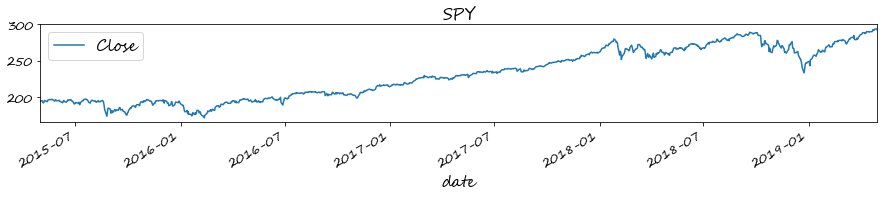

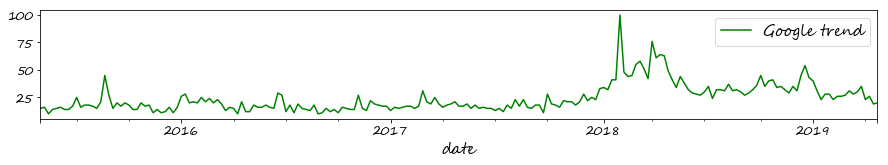

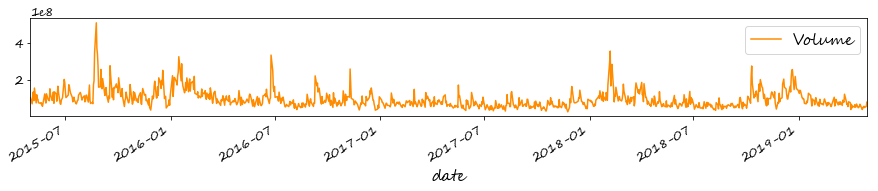

In [59]:
# Plot close, google trend and volume
def compare(sym): 
    fig = plt.figure(figsize=(15, 2))
    plt.title(sym,fontsize=16)
    close_spy = df_d[df_d['Symbols'] == sym]['close'].loc['2015-05-01':'2019-05-01']
    volume_spy = df_d[df_d['Symbols'] == sym]['volume'].loc['2015-05-01':'2019-05-01']
    close_spy.plot(label='Close')
    plt.legend()
    
    plt.figure(figsize=(15, 2))
    df_g[sym+' ETF'].loc['2015-05-01':'2019-05-01'].plot(color='g',label='Google trend')
    plt.legend()
    
    plt.figure(figsize=(15, 2))
    volume_spy.plot(color='darkorange',label='Volume')
    plt.legend()

compare('SPY')

* Interpretation  
> The movement of close price and google trend is obscure  
> It seems that whenever google trend has a drastic change, close price also rise or plunge  
> The trend of google trend data and volume data is similer  

To make sure, plot the data of another ETF.  
I choose 'XLK' because technology seema to be a sector that will have relatively obvious relationship between its price and search data.   

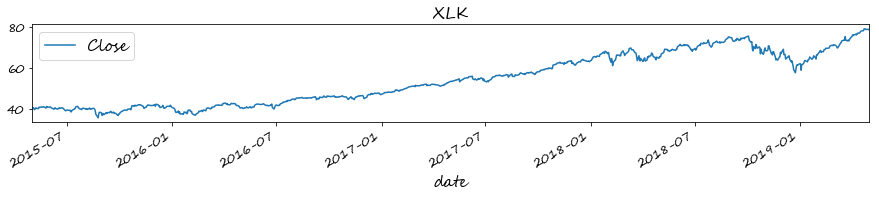

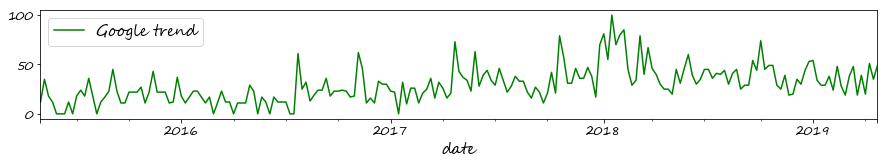

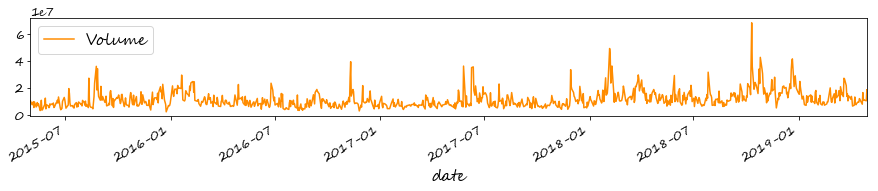

In [60]:
compare('XLK')

* Interpretation  
> The movement of close price and google trend is more obscure(except data between 2018-08 to 2019-05)    
> The part which google trend has drastic movement could correspond to the part when volume rise adruptly
> Again, the trend of google trend data and volume data seems to be similer  

Since the correlation will be calculated using weekly data, it would be better to observe and compare the weekly data. Thus, again I visualize the data of SPY. 

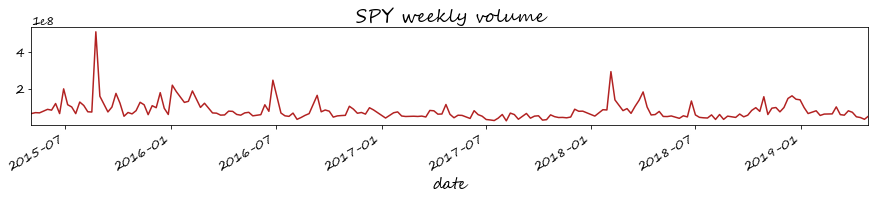

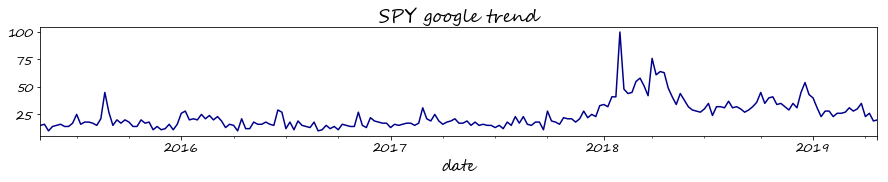

In [61]:
fig = plt.figure(figsize=(15, 2))
plt.title('SPY weekly volume')
df_week[df_week['Symbols'] == 'SPY']['volume'].plot(color='firebrick')

fig = plt.figure(figsize=(15, 2))
plt.title('SPY google trend')
df_g['SPY ETF'].loc['2015-05-01':'2019-05-01'].plot(color='darkblue')

Surprisingly, in my opinion, I found that the two trend look stii and even more similar.  
Or at least when volume increase greatly, google trend data is high too.  

Considering the goal is to set a investment strategy, it's importent to find out if search frequency increase represent a volume or close prise rise.  
Thus, convert the data into change percentage to observe.  

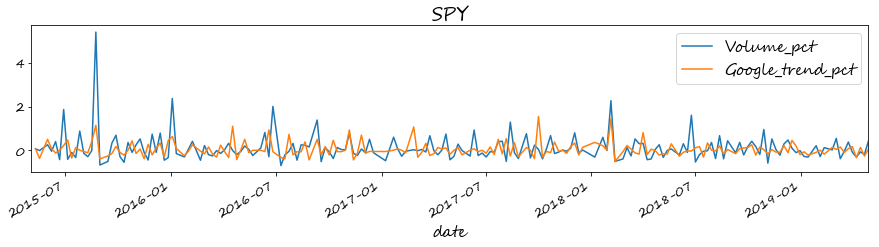

In [62]:
plt.title('SPY')
sort('SPY')['volume'].pct_change().plot(label='Volume_pct')
sort('SPY')['SPY ETF'].pct_change().plot(label='Google_trend_pct')
plt.legend()

The date that volume is relatively high, the value of google trend data is also relatively high. However, there's still some part of the trend seem doesn't corresponded.  

After the observation, it's time to quantize the correlation. I use the simplest one - pearson correlation.  
formula: 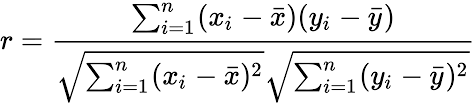  

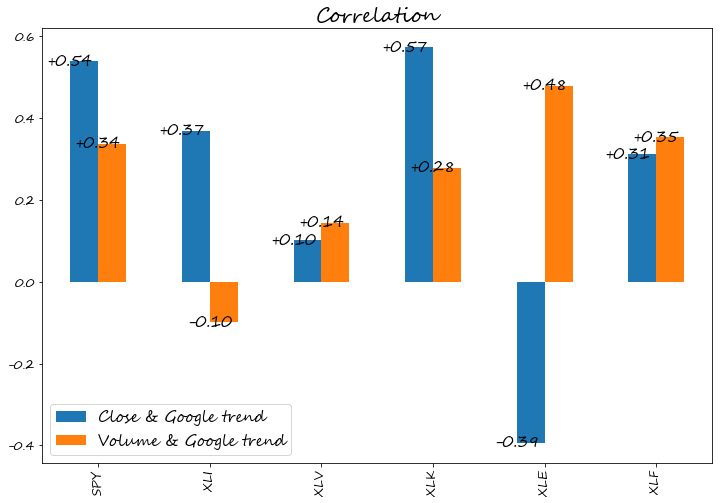

In [64]:
#print(len(spyc1[1:]),len(df['SPY ETF'].loc['2015-05-01':'2019-05-01'][:-4]))
corr_cg = []
corr_vg = []

def corr(sym):
    close_ = sort(sym)['close']
    volume_ = sort(sym)['volume']
    google_ = sort(sym)[sym+' ETF']
    cor_cg = pd.merge(close_,google_,how='outer',left_index=True,right_index=True)
    cor_vg = pd.merge(volume_,google_,how='outer',left_index=True,right_index=True)
    
    corr_cg.append(cor_cg.corr(method ='pearson').iloc[0,1])
    corr_vg.append(cor_vg.corr(method ='pearson').iloc[0,1])

spdr = ['SPY','XLI','XLV','XLK','XLE','XLF'] # spdr sector'XLI
for i in spdr:
    corr(i)

df_corr = pd.DataFrame({'Close & Google trend': corr_cg, 'Volume & Google trend': corr_vg}, index=spdr)
ax = df_corr.plot.bar(figsize=(12,8),fontsize=12)
plt.title('Correlation',fontsize=20)

# add annotation
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x(), p.get_y()+p.get_height(),
             '{:+.2f}'.format(height),ha='center', va='center')

I have to admit, the result isn't what I respect.  
* Interpretation  
> 'SPY' and 'XLK' has the most two high correlation coefficient      
> Compare to close price, the correlation coefficient is relatively low  
> In 'XLE' case, the correlation coefficient of close and google trend is negative  
> Overall, none of the value higher than 0.6  

Although the numbers isn't high as I thought, the calculate method might be bias when the relationship isn't linear or the rolling window is wrong. Besides, by the result we could still say that there's positive correlation.   

Because the result of pearson correlation didn't seem correspond to the plots. Thus, further plot the data in a scatter way to observe their relationship.  

Close price and google trend:  

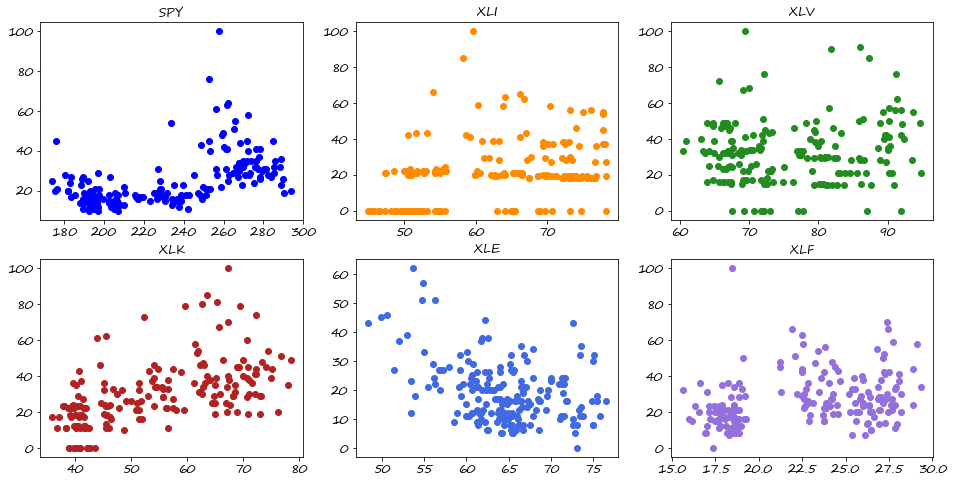

In [9]:
def plot_scat(data):    
    l, k, c = 0,0,0
    fig,axes=plt.subplots(2,3,figsize=(16,8))
    colors = ['blue','darkorange','forestgreen','firebrick','royalblue','mediumpurple']
    for i in spdr:
        x = sort(i)[data]
        y = sort(i)[i+' ETF']
    
        if i == spdr[0] or i == spdr[1] or i == spdr[2]:
            axes[0,l].scatter(x,y,color=colors[c])
            axes[0,l].set_title(i)
            l += 1
        else:
            axes[1,k].scatter(x,y,color=colors[c])
            axes[1,k].set_title(i)
            k += 1
        c += 1
        
plot_scat('close')

* Interpretation  
> 'SPY' and 'XLK' is more like to have a positive slope      
> As for 'XLE', it has a negative slope   
> The correlation of rest of the ETF seems to be obscurr  
> The result is quite fit the pearson correlation    

Volume and google treand:  

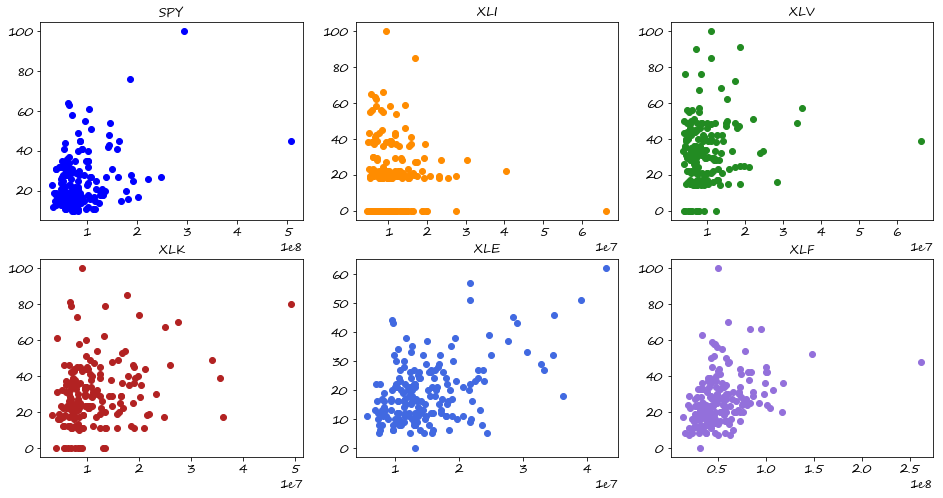

In [10]:
plot_scat('volume')

From the scatter plot, volume and google trend seem more correlated.  